In [1]:
import bezier

import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams['figure.figsize'] = [8, 8]

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pandas.api.types import CategoricalDtype

import ppscore as pps

from scipy import stats
from scipy.interpolate import CubicSpline


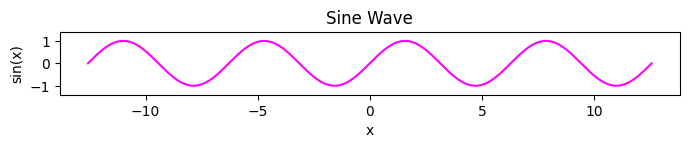

In [2]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x)

plt.plot(x, y, color='magenta')

plt.ylim(min(y) - 0.4, max(y) + 0.4)

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Wave')

plt.gca().set_aspect('equal')

plt.show()

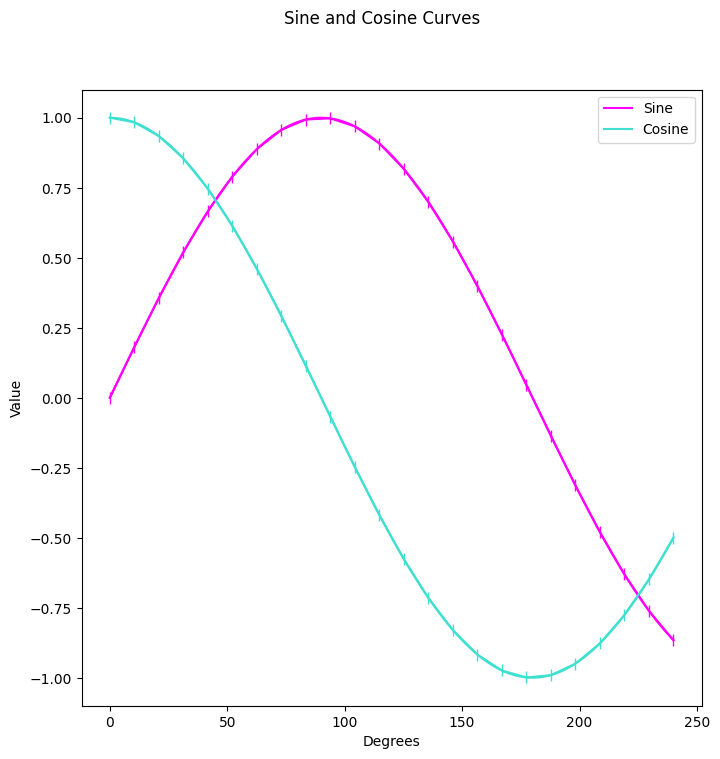

In [3]:
x = np.linspace(0, 240, 1000)
x_rad = np.radians(x)
y_sin = np.sin(x_rad)
y_cos = np.cos(x_rad)

plt.plot(x, y_sin, color='magenta', linestyle='-', label='Sine')
plt.plot(x, y_cos, color='turquoise', linestyle='-', label='Cosine')

x_markers = np.linspace(0, 240, 24)
x_rad_markers = np.radians(x_markers)
y_sin_markers = np.sin(x_rad_markers)
y_cos_markers = np.cos(x_rad_markers)

plt.plot(x_markers, y_sin_markers, color='magenta', marker='|', markersize=9)
plt.plot(x_markers, y_cos_markers, color='turquoise', marker='|', markersize=9)

plt.legend()
plt.suptitle('Sine and Cosine Curves')
plt.xlabel('Degrees')
plt.ylabel('Value')

plt.show()


In [4]:
x_y_pd = pd.read_csv("../data/1.dat.csv", sep=',', skipinitialspace=True)

x = x_y_pd['x']
y = x_y_pd['y']

#plt.plot(x, y, color='magenta', marker='.')

#plt.legend()
#plt.suptitle('1.dat.csv')
#plt.xlabel('x')
#plt.ylabel('y')

#plt.show()

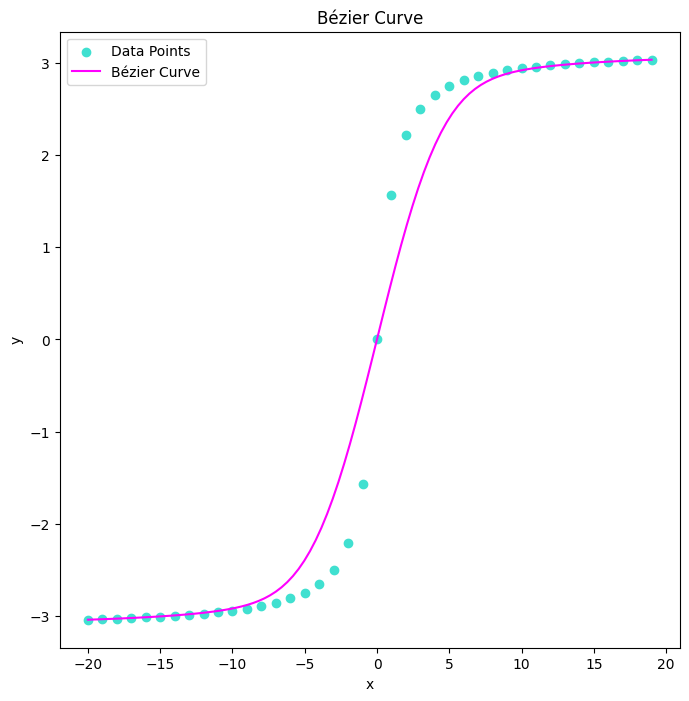

In [5]:
# 4.1 A Bézier curve is a parametric curve defined by a set of control points.

assert x.shape == y.shape

nodes = np.asfortranarray([x, y])

bezier_curve = bezier.Curve(nodes, degree=len(x)-1)

num_points = 100  # Adjust the number of points as desired
points = bezier_curve.evaluate_multi(np.linspace(0, 1, num_points))

plt.scatter(x, y, color='turquoise', label='Data Points')
plt.plot(points[0], points[1], linestyle='-', color='magenta', label='Bézier Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bézier Curve')
plt.show()

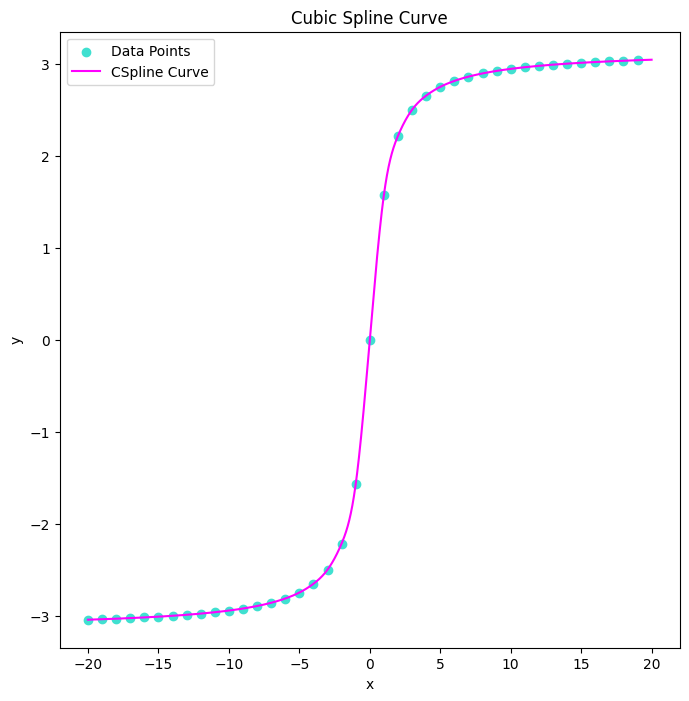

In [6]:
# 4.2 A cubic spline or cspline is a non-linear function that consists of multiple cubic polynomials.
# Its polynomials have continues first and second derivatives.

# A side-note on terminology. There is also the notion of b-splines.
# Any spline, such as a cubic spline, can be expressed as a combination of b-splines.

assert x.shape == y.shape

cspline_curve = CubicSpline(x, y)

cspline_curve_axis = np.linspace(-20, 20, 10000)
cspline_curve_result = cspline_curve(cspline_curve_axis)

plt.scatter(x, y, color='turquoise', label='Data Points')

plt.plot(cspline_curve_axis, cspline_curve_result, color='magenta', label='CSpline Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Curve')
plt.legend()

plt.show()

1.0
-1.0
[-0.1      -0.100002 -0.100004 ...  0.100004  0.100002  0.1     ]
3.999520026581719e+48
0.21


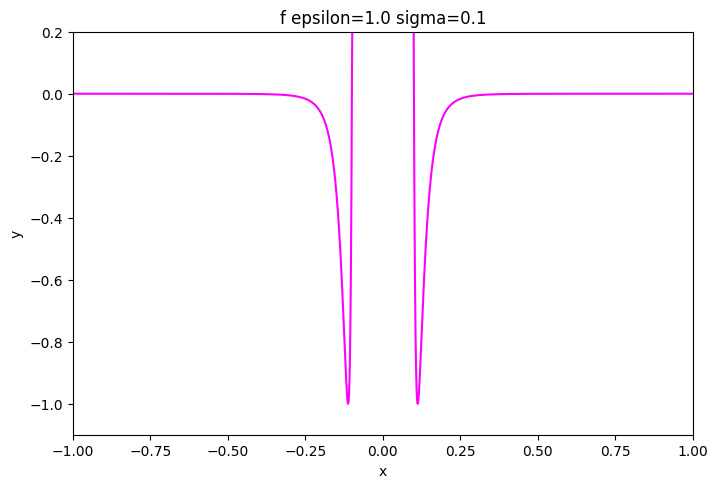

In [7]:
# 5. Energiezustand eines geschlossenen Systems in Abhängigkeit vom Abstand zweier Objekte

def the_function(epsilon, sigma, xs):    
    sigma_over_x = np.divide(sigma, xs)
    print(sigma_over_x)
    p = (sigma_over_x**12 - sigma_over_x**6)
    r = 4 * epsilon * p
    return r

epsilon = 1.0
sigma = 0.1
y_cutoff = 0.21

assert the_function(epsilon, sigma, sigma) == 0.0
assert the_function(epsilon, sigma, -sigma) == 0.0

xs = np.linspace(-1.0, 1.0, 100000)
ys_pure = the_function(epsilon, sigma, xs)
print(np.max(ys_pure))
ys = np.minimum(ys_pure, y_cutoff)
print(np.max(ys))

plt.plot(xs, ys, color='magenta')

plt.xlim(-1.0, 1.0)
plt.ylim(-1.1, 0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"f epsilon={epsilon} sigma={sigma}")

plt.gca().set_aspect('equal')

plt.show()


1.0
-1.0
[-0.2      -0.200004 -0.200008 ...  0.200008  0.200004  0.2     ]


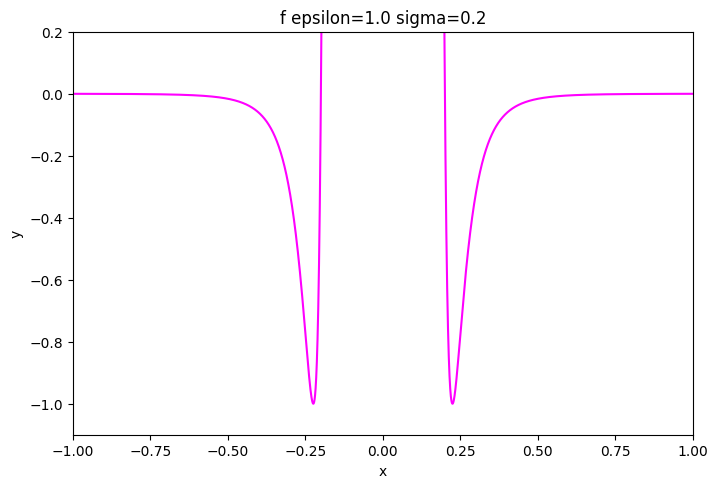

In [8]:
epsilon = 1.0
sigma = 0.2
y_cutoff = 0.21

assert the_function(epsilon, sigma, sigma) == 0.0
assert the_function(epsilon, sigma, -sigma) == 0.0

xs = np.linspace(-1.0, 1.0, 100000)
ys_pure = the_function(epsilon, sigma, xs)

ys = np.minimum(ys_pure, y_cutoff)

plt.plot(xs, ys, color='magenta')

plt.xlim(-1.0, 1.0)
plt.ylim(-1.1, 0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"f epsilon={epsilon} sigma={sigma}")

plt.gca().set_aspect('equal')

plt.show()


1.0
-1.0
[-0.4      -0.400008 -0.400016 ...  0.400016  0.400008  0.4     ]


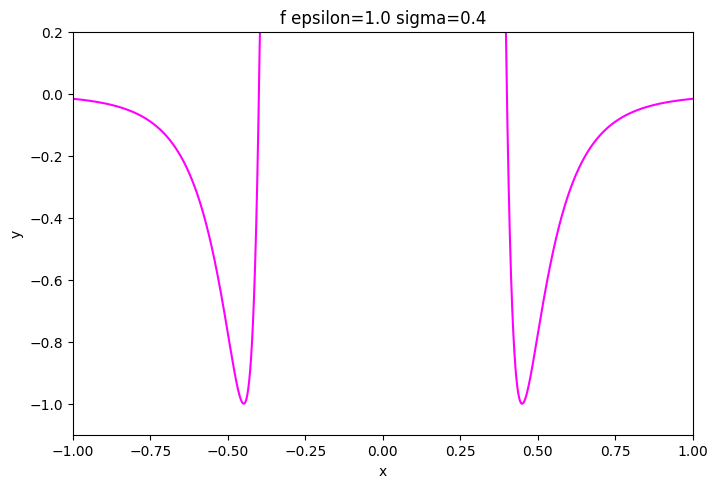

In [9]:
epsilon = 1.0
sigma = 0.4
y_cutoff = 0.21

assert the_function(epsilon, sigma, sigma) == 0.0
assert the_function(epsilon, sigma, -sigma) == 0.0

xs = np.linspace(-1.0, 1.0, 100000)
ys_pure = the_function(epsilon, sigma, xs)

ys = np.minimum(ys_pure, y_cutoff)

plt.plot(xs, ys, color='magenta')

plt.xlim(-1.0, 1.0)
plt.ylim(-1.1, 0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"f epsilon={epsilon} sigma={sigma}")

plt.gca().set_aspect('equal')

plt.show()


1.0
-1.0
[-0.1      -0.100002 -0.100004 ...  0.100004  0.100002  0.1     ]


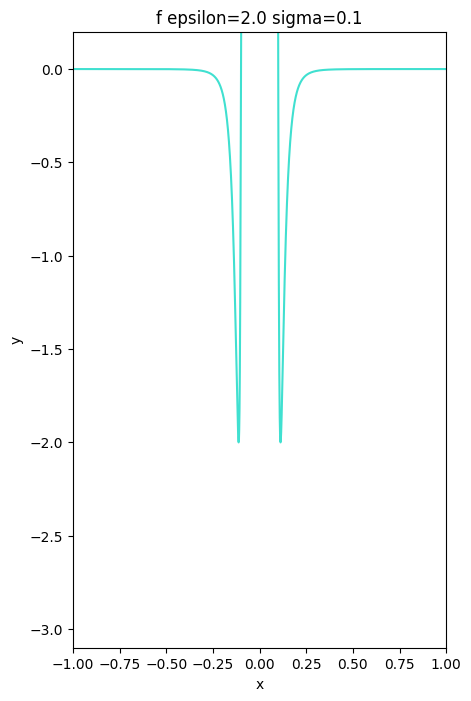

In [10]:
epsilon = 2.0
sigma = 0.1
y_cutoff = 0.21

assert the_function(epsilon, sigma, sigma) == 0.0
assert the_function(epsilon, sigma, -sigma) == 0.0

xs = np.linspace(-1.0, 1.0, 100000)
ys_pure = the_function(epsilon, sigma, xs)

ys = np.minimum(ys_pure, y_cutoff)

plt.plot(xs, ys, color='turquoise')

plt.xlim(-1.0, 1.0)
plt.ylim(-3.1, 0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"f epsilon={epsilon} sigma={sigma}")

plt.gca().set_aspect('equal')

plt.show()


1.0
-1.0
[-0.1      -0.100002 -0.100004 ...  0.100004  0.100002  0.1     ]


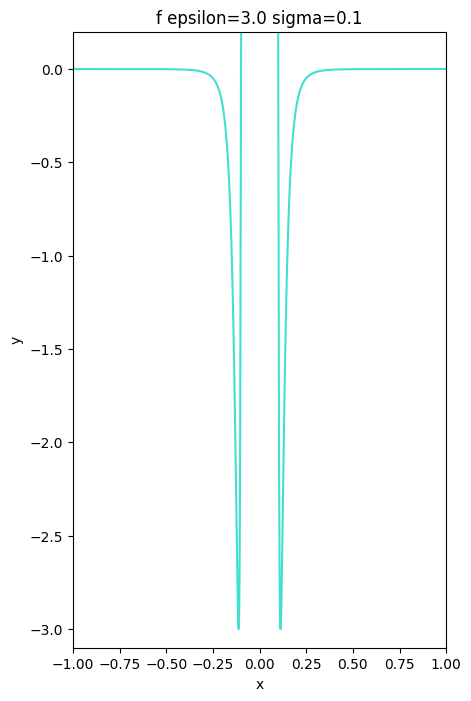

In [11]:
epsilon = 3.0
sigma = 0.1
y_cutoff = 0.21

assert the_function(epsilon, sigma, sigma) == 0.0
assert the_function(epsilon, sigma, -sigma) == 0.0

xs = np.linspace(-1.0, 1.0, 100000)
ys_pure = the_function(epsilon, sigma, xs)

ys = np.minimum(ys_pure, y_cutoff)

plt.plot(xs, ys, color='turquoise')

plt.xlim(-1.0, 1.0)
plt.ylim(-3.1, 0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"f epsilon={epsilon} sigma={sigma}")

plt.gca().set_aspect('equal')

plt.show()


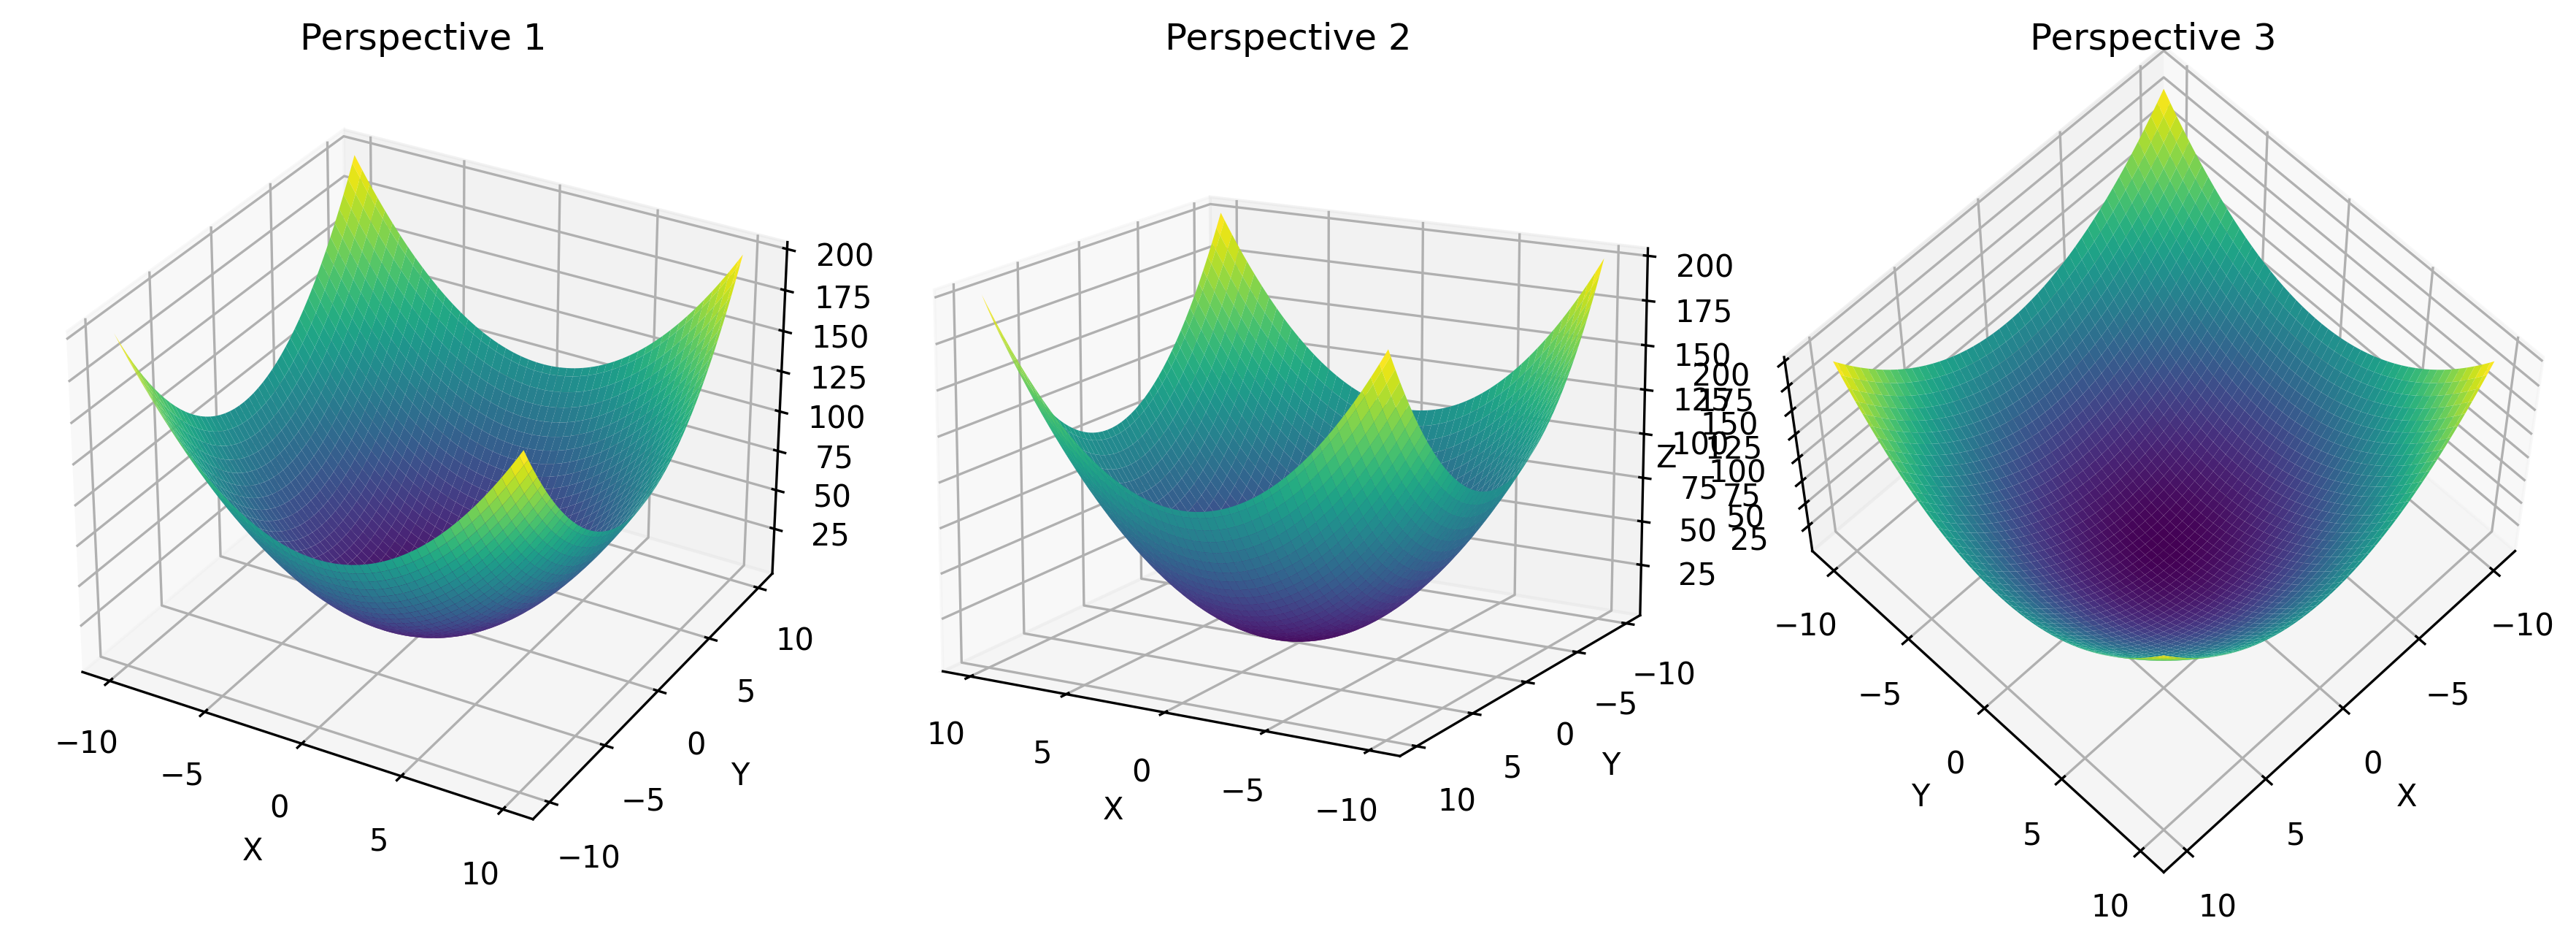

In [12]:
# Define the function
def f(x, y):
    return x**2 + y**2

# Generate data points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot from different perspectives
fig = plt.figure(figsize=(12, 4), dpi=300)  # Adjust the figure size and dpi for high resolution

# Perspective 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Perspective 1')

# Perspective 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.view_init(elev=15, azim=120)  # Adjust the elevation and azimuth angles for a perspective from below
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Perspective 2')

# Perspective 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='viridis')
ax3.view_init(elev=60, azim=45)  # Adjust the elevation and azimuth angles
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Perspective 3')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/h2/lkcg_8md1x38x9b_fv91s7pw0000gn/T/ipykernel_13363/2294909397.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sqrt(0.2 * x + 0.4 * y))


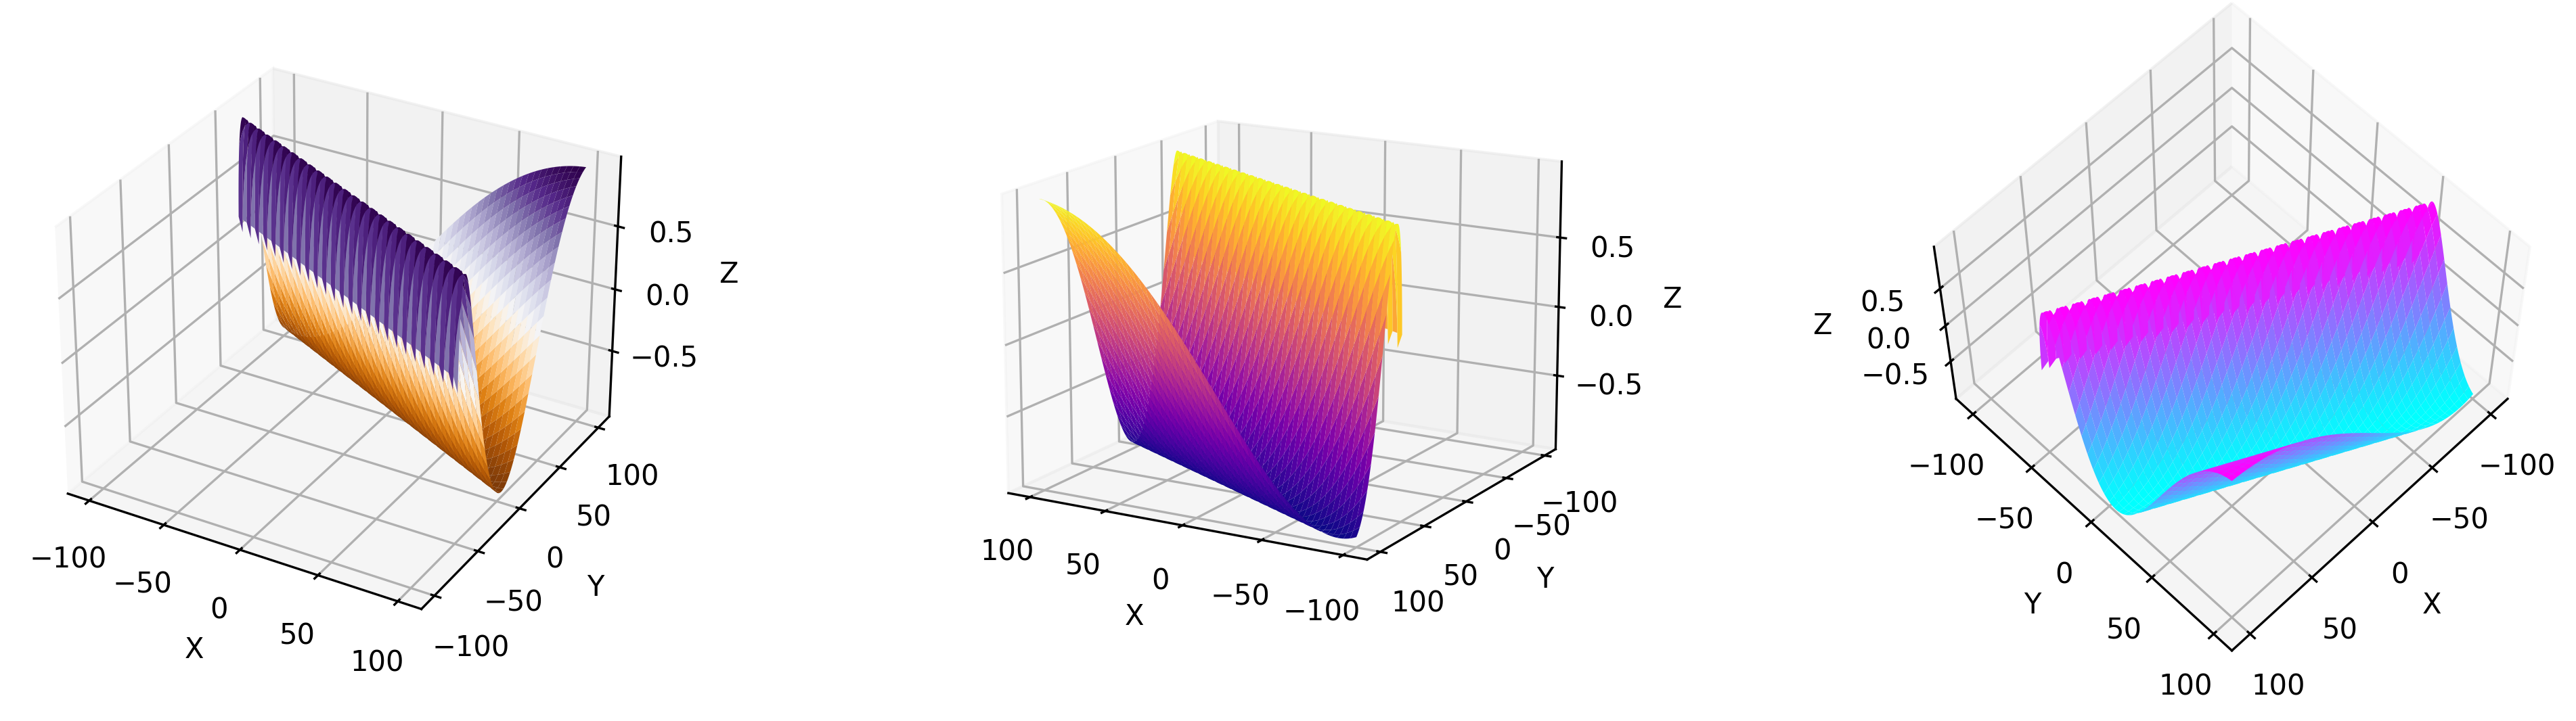

In [13]:
# Define the function f(x, y) = z
def f(x, y):
    return np.sin(np.sqrt(0.2 * x + 0.4 * y))

# Generate x and y values
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)

# Calculate z values using the function
Z = f(X, Y)

# Create the figure and subplots
fig = plt.figure(figsize=(16, 9), dpi=300)  # Adjust the figure size and dpi for high resolution

# First subplot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='PuOr')
#ax1.xlim(-100, 100)
#ax1.ylim(-100, 100)
#ax1.zlim(-10, 10)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Second subplot
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='plasma')
ax2.view_init(elev=15, azim=120)  # Adjust the elevation and azimuth angles for a perspective from below
#ax2.xlim(-100, 100)
#ax2.ylim(-100, 100)
#ax2.zlim(-10, 10)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Third subplot
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='cool')
ax3.view_init(elev=60, azim=45)  # Adjust the elevation and azimuth angles
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()